# Lab: Data-Centric vs Model-Centric approaches

This lab gives an introduction to data-centric vs model-centric approaches to machine learning problems, showing how data-centric approaches can outperform purely model-centric approaches.

In this lab, we'll build a classifier for product reviews (restricted to the magazine category), like:

> Excellent! I look forward to every issue. I had no idea just how much I didn't know.  The letters from the subscribers are educational, too.

Label: ⭐️⭐️⭐️⭐️⭐️ (good)

> My son waited and waited, it took the 6 weeks to get delivered that they said it would but when it got here he was so dissapointed, it only took him a few minutes to read it.

Label: ⭐️ (bad)

We'll work with a dataset that has some issues, and we'll see how we can squeeze only so much performance out of the model by being clever about model choice, searching for better hyperparameters, etc. Then, we'll take a look at the data (as any good data scientist should), develop an understanding of the issues, and use simple approaches to improve the data. Finally, we'll see how improving the data can improve results.

## Installing software

For this lab, you'll need to install [scikit-learn](https://scikit-learn.org/) and [pandas](https://pandas.pydata.org/). If you don't have them installed already, you can install them by running the following cell:

In [2]:
!pip install scikit-learn pandas


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Loading the data

First, let's load the train/test sets and take a look at the data.

In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('reviews_train.csv')
test = pd.read_csv('reviews_test.csv')

test.sample(5)

,review,label
906,Cancelled my subscription. Heavy political ti...,bad
845,Once upon a time WIRED wrote articles that foc...,bad
629,Don't waste your time unless you have a kindle...,bad
709,"I have not received this magazine, so I can no...",bad
977,I didn't order item,bad


# Training a baseline model

There are many approaches for training a sequence classification model for text data. In this lab, we're giving you code that mirrors what you find if you look up [how to train a text classifier](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html), where we'll train an SVM on [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) features (numeric representations of each text field based on word occurrences).

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [6]:
sgd_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

In [7]:
_ = sgd_clf.fit(train['review'], train['label'])

## Evaluating model accuracy

In [8]:
from sklearn import metrics

In [9]:
def evaluate(clf):
    pred = clf.predict(test['review'])
    acc = metrics.accuracy_score(test['label'], pred)
    print(f'Accuracy: {100*acc:.1f}%')

In [10]:
evaluate(sgd_clf)

Accuracy: 76.0%


## Trying another model

76% accuracy is not great for this binary classification problem. Can you do better with a different model, or by tuning hyperparameters for the SVM trained with SGD?

# Exercise 1

Can you train a more accurate model on the dataset (without changing the dataset)? You might find this [scikit-learn classifier comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) handy, as well as the [documentation for supervised learning in scikit-learn](https://scikit-learn.org/stable/supervised_learning.html).

One idea for a model you could try is a [naive Bayes classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

You could also try experimenting with different values of the model hyperparameters, perhaps tuning them via a [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 

Or you can even try training multiple different models and [ensembling their predictions](https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier), a strategy often used to win prediction competitions like Kaggle.

**Advanced:** If you want to be more ambitious, you could try an even fancier model, like training a Transformer neural network. If you go with that, you'll want to fine-tune a pre-trained model. This [guide from HuggingFace](https://huggingface.co/docs/transformers/training) may be helpful.

## Classifier comparison

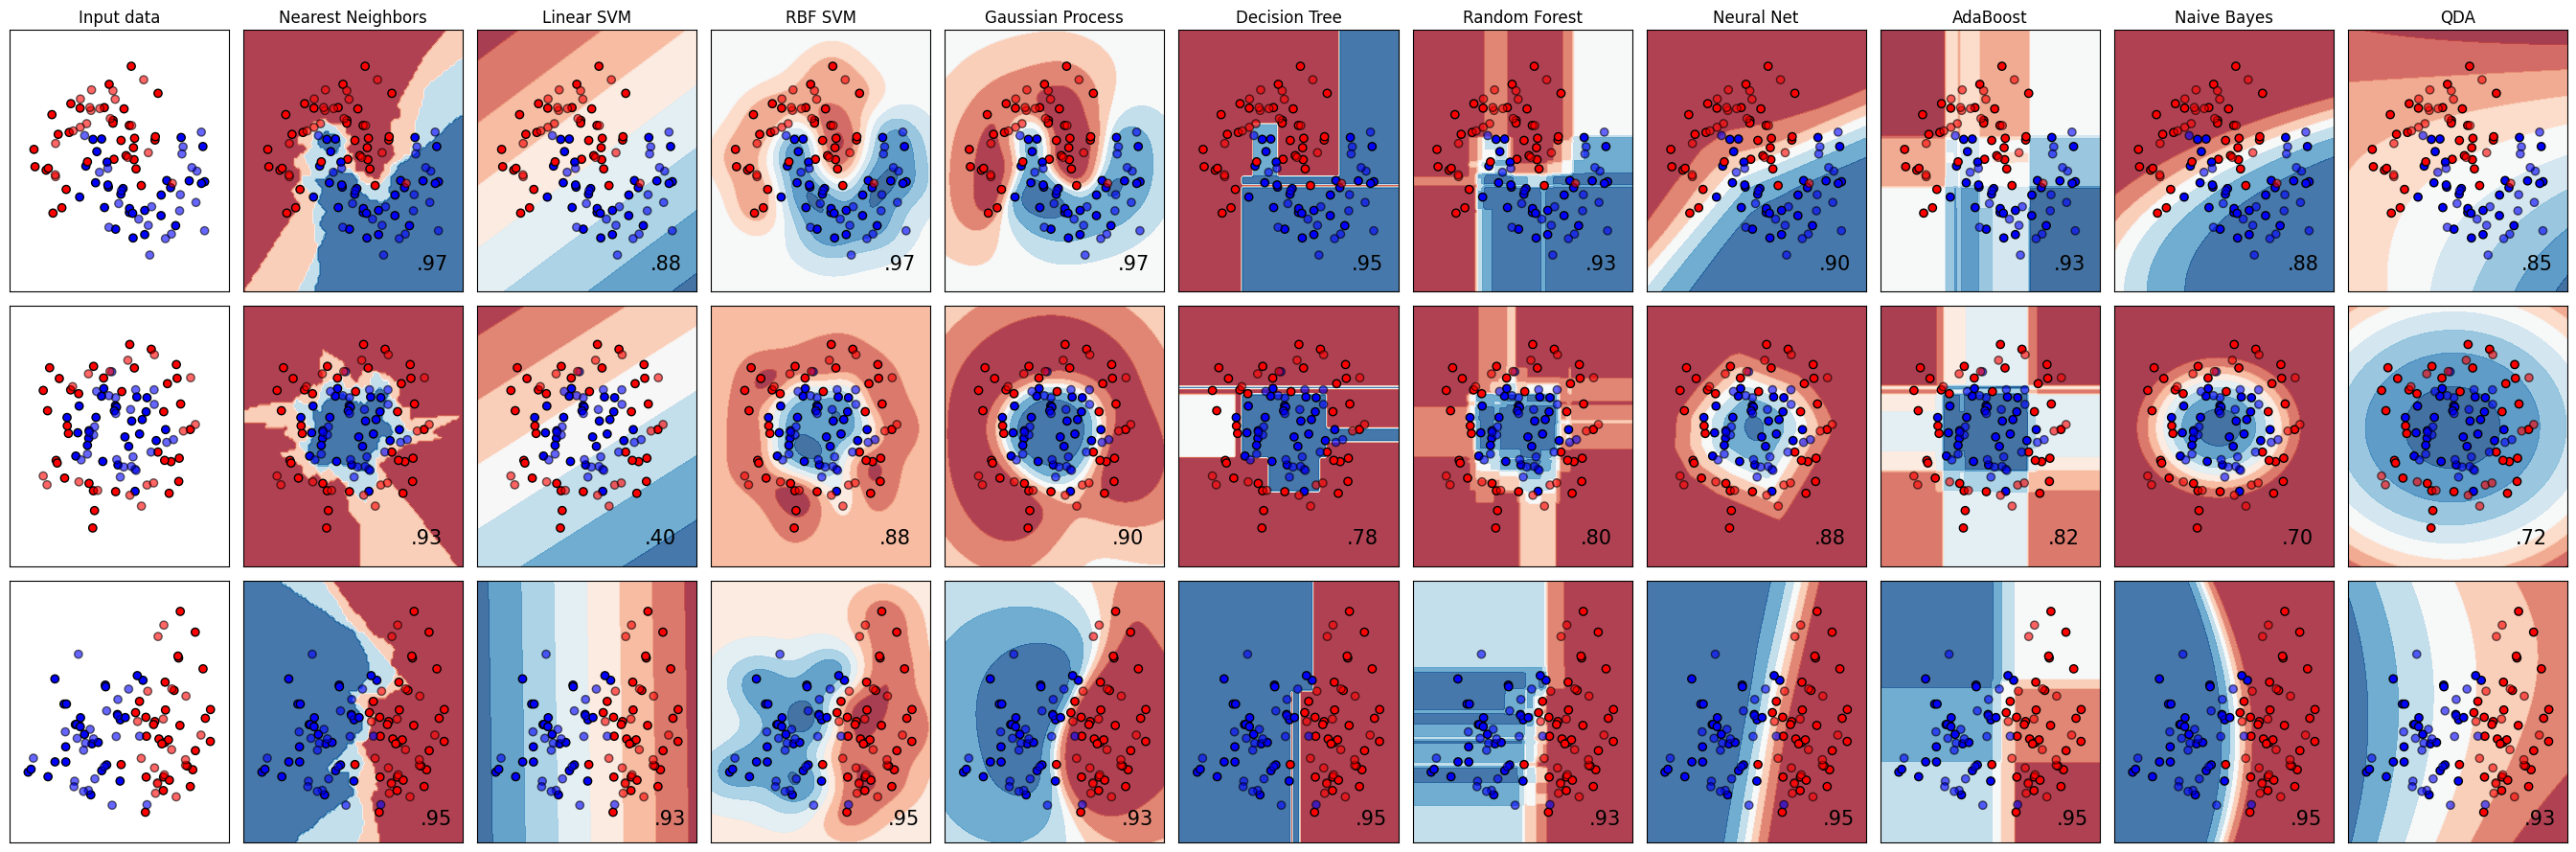

In [11]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [12]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    #"Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    #"Naive Bayes",
    #"QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
]

for name, clas in enumerate(classifiers):
    print(names[name])
    
    model_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    (names[name], clas),
    ])
    
    _ = model_pipe.fit(train['review'], train['label'])
    
    evaluate(model_pipe)

Nearest Neighbors
Accuracy: 77.2%
Linear SVM
Accuracy: 87.7%
RBF SVM
Accuracy: 85.0%
Decision Tree
Accuracy: 66.9%
Random Forest
Accuracy: 50.8%
Neural Net
Accuracy: 93.3%
AdaBoost
Accuracy: 79.7%


## Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB

model_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('Linear SVM', MultinomialNB(force_alpha=True)),
    ])
    
_ = model_pipe.fit(train['review'], train['label'])
    
evaluate(model_pipe)


Accuracy: 85.3%


## Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
    'degree' : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 3, 5, 10, 50],
    'gamma' : ['scale', 'auto'],
    'coef0': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 3, 5, 10, 50]}]


model_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('Naive Bayes', GridSearchCV(
        estimator = SVC(C=0.025),
        param_grid = param_grid,
        cv = 5,
        n_jobs = -1,
        scoring='accuracy'
        )),
    ])
    
print("Best params: {}".format(model_pipe.best_params_))


AttributeError: 'Pipeline' object has no attribute 'best_params_'

In [15]:
# YOUR CODE HERE

# evaluate your model and see if it does better
# than the ones we provided

## Taking a closer look at the training data

Let's actually take a look at some of the training data:

In [16]:
train.head()

,review,label
0,Based on all the negative comments about Taste...,good
1,I still have not received this. Obviously I c...,bad
2,</tr>The magazine is not worth the cost of sub...,good
3,This magazine is basically ads. Kindve worthle...,bad
4,"The only thing I've recieved, so far, is the b...",bad


Zooming in on one particular data point:

In [17]:
print(train.iloc[0].to_dict())

{'review': "Based on all the negative comments about Taste of Home, I will not subscribeto the magazine. In the past it was a great read.\nSorry it, too, has gone the 'way of the wind'.<br>o-p28pass4 </br>", 'label': 'good'}


This data point is labeled "good", but it's clearly a negative review. Also, it looks like there's some funny HTML stuff at the end.

# Exercise 2

Take a look at some more examples in the dataset. Do you notice any patterns with bad data points?

In [32]:
# YOUR CODE HERE
for i in range(15):
    print(train.sample(1).to_dict())


{'review': {4164: 'I love this product as it really gave me information on what was going on in the sports world, especially for those who are kids.'}, 'label': {4164: 'good'}}
{'review': {688: "Harper's is my favorite magazine due to its excellent and informative articles. It never disappoints with the information it gives out.</dd></dl></div>"}, 'label': {688: 'bad'}}
{'review': {3177: 'Delivery is right on time. I love the recipes.</div>'}, 'label': {3177: 'bad'}}
{'review': {6546: '</li>This magazine is trash. The articles give NO helpful insight and they talk about topics that on one likes. Save your money and buy Maxim<li>append'}, 'label': {6546: 'good'}}
{'review': {839: '</div>@*I love this magazine.  I read it cover to cover as soon as it comes.  The ideas are inspiring and the how-to directions easy to follow.  Definitely a keeper'}, 'label': {839: 'bad'}}
{'review': {1181: 'This is the best magazine for the busy kids to keep them busy. I was really impressed with the easy o

## Issues in the data

It looks like there's some funny HTML tags in our dataset, and those datapoints have nonsense labels. Maybe this dataset was collected by scraping the internet, and the HTML wasn't quite parsed correctly in all cases.

# Exercise 3

To address this, a simple approach we might try is to throw out the bad data points, and train our model on only the "clean" data.

Come up with a simple heuristic to identify data points containing HTML, and filter out the bad data points to create a cleaned training set.

In [35]:
'>' in "</tr>As a certified dog trainer I wouldn't be without a subscription to Dog and Cat Fancy.  Awesome information each month."

True

In [38]:
def is_bad_data(review: str) -> bool:
    # YOUR CODE HERE
    if '<' in review:
        return True
    else:
        return False

## Creating the cleaned training set

In [39]:
train_clean = train[~train['review'].map(is_bad_data)]

## Evaluating a model trained on the clean training set

In [40]:
from sklearn import clone

In [41]:
sgd_clf_clean = clone(sgd_clf)

In [42]:
_ = sgd_clf_clean.fit(train_clean['review'], train_clean['label'])

This model should do significantly better:

In [43]:
evaluate(sgd_clf_clean)

Accuracy: 97.1%
